# Lending Club Case Study

## Problem Statement 
- If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default). <br>
- If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default). 

## Goal
- Reduce the Credit Loss by using EDA techniques to understand how consumer attributes and loan attributes influence the tendency of default and find the driving factors for the defaulting of loan.


## Data Understanding

In [46]:
#importing required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#adding to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [1496]:
#read the loan data frame
loan_df = pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1042]:
#read the loan data dictionary
loan_dd = pd.read_excel('Data_Dictionary.xlsx')
loan_dd.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [52]:
# check shape of loan dataframe
loan_df.shape

(39717, 111)

In [54]:
# check datatypes of each column of loan dataframe
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [58]:
# Basic infomation about the dataframe
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [60]:
# Columns in the loan dataframe
print(loan_df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


# Data cleaning

## Check missing values in Columns

In [115]:
# Check for missing values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<b>There are columns with missing value count equals to number of rows i.e. 39717 which means these columns contains all null values. Let's first remove these columns.</b>

In [1498]:
# Remove columns with all null values
loan_df.dropna(axis = 1, how = 'all', inplace = True)
# Shape of the dataframe after removing columns
loan_df.shape

(39717, 57)

<b>The Number of columns are now reduced from 111 to 57. Lets analyse further if any column has more than 50% null values.</b>

In [103]:
# Check column with lot of null values
(loan_df.isnull().mean().round(2)).sort_values(ascending=False)

next_pymnt_d                  0.97
mths_since_last_record        0.93
mths_since_last_delinq        0.65
desc                          0.33
emp_title                     0.06
emp_length                    0.03
pub_rec_bankruptcies          0.02
delinq_amnt                   0.00
total_rec_int                 0.00
revol_bal                     0.00
revol_util                    0.00
total_acc                     0.00
initial_list_status           0.00
out_prncp                     0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
total_rec_prncp               0.00
recoveries                    0.00
total_rec_late_fee            0.00
chargeoff_within_12_mths      0.00
pub_rec                       0.00
last_pymnt_d                  0.00
last_pymnt_amnt               0.00
last_credit_pull_d            0.00
collections_12_mths_ex_med    0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq      

<b> We can notice 3 columns where missing value mean is more than 0.50, Now lets remove them and check the number of columns gets reduced by 3.</b>

In [1500]:
# Removing column with more than 50% null values 
loan_df.dropna(axis = 1, thresh = 0.5*len(loan_df), inplace = True)
# Shape of the dataframe after removing columns
loan_df.shape

(39717, 54)

<b> We have removed the column which contain more than 50% missing values which will reduce impact on analyis and imporve the accuracy of the analysis. </b>

## Check missing values in Rows

In [129]:
# check null rows in dataframe
loan_df.isnull().all(axis=1).sum()

0

<b> There are no empty rows in dataframe with all missing values</b>

In [136]:
# Check max number of missing values across rows
(loan_df.isnull().sum(axis=1)).max()

6

<b> As the max number of missing values in row is very low compared to the count of columns i.e. 54, the impact is not significant.</b>

## Check Duplicates 

In [108]:
# check duplicates in dataframe
loan_df.duplicated().sum()

0

<b> There are no duplicates in the data frame.</b>

## Check Uniques

In [1061]:
# Checking columns unqiue values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

<b> As there are many columns with only 1 unique value i.e. single valued columns, let's remove them as they are not relevant to the analysis.</b>

In [1502]:
# Removing columns which contains only a single value
loan_df = loan_df.loc[:,loan_df.nunique()>1]
# Shape of the dataframe after removing columns
loan_df.shape

(39717, 45)

<b> We can notice 9 single valued columns are now reduced from the dataframe.</b>

In [1067]:
# Check the columns present now in the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Remove irrelevant columns

<b> Now, let's remove few irrelevant columns which have no relevance to the analysis</b>

Columns (id,member_id) will be dropped as they are index variables with unique values and do not contribute to the analysis.<br>
Columns (title,emp_title,desc,url,zip_code) will be dropped as they contain descriptive text (nouns) and do not contribute to the analysis.<br>
Columns (sub_grade,funded_amnt,funded_amnt_inv) will be dropped as they contain extra information not relevant to the analysis.

In [1504]:
# Removing below columns as they have irrelevant information
unneccesary_cols = ['id','member_id','title','emp_title','desc','url','zip_code','sub_grade','funded_amnt','funded_amnt_inv']
loan_df.drop(unneccesary_cols, inplace=True, axis=1)

# Shape of the dataframe after removing columns
loan_df.shape

(39717, 35)

In [431]:
# Check the columns present now in the dataframe
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

<b> Now, let's remove columns which are customer behaviour variables and are calculated after loan approval thus they cannot be used as input for the analysis.</b>

In [1506]:
# Removing post loan appoval columns
post_approval_cols=['installment','delinq_2yrs','earliest_cr_line','inq_last_6mths','pub_rec','revol_bal','revol_util','total_acc',
                    'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp', 'total_rec_int','total_rec_late_fee',
                    'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_df.drop(post_approval_cols, inplace=True, axis=1)
 
# Shape of the dataframe after removing columns
loan_df.shape

(39717, 15)

<b> Now, we can see the number of columns are reduced to 19 and they look relevant to our analysis.</b>

In [1508]:
# Check the columns present now in the dataframe
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'open_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

## Filter Relevant Data

<b> The goal of analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans. We cannot derive anything from Current loan status.</b>

In [1510]:
# Exclude records with current loan status
loan_df = loan_df[loan_df.loan_status != "Current"]
# Check values of loan_status column
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [1512]:
# Shape of the dataframe after removing rows
loan_df.shape

(38577, 15)

<b> We can notice the number of rows reduced from 39717 to 38577</b>

## Fixing the null values

In [1514]:
# Check for missing values across the dataframe
loan_df.isnull().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
dtype: int64

<b> We can notice the first 2 columns (emp_length and pub_rec_bankruptcies) have null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.</b>

In [1516]:
# Check values in emp_length column
loan_df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [445]:
# Analyse the emp_length column
loan_df.emp_length.value_counts().describe()

count      11.000000
mean     3413.090909
std      2033.203259
min      1226.000000
25%      1939.500000
50%      3194.000000
75%      4151.500000
max      8488.000000
Name: count, dtype: float64

<b> The above data shows that the mode value has a high frequency. So, we can safely assign the value of mode to the null values in the column.
Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.</b>

In [1518]:
# fill the null values with mode value of emp_length column
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
# Check emp_length column if any null value still exists
loan_df.emp_length.isna().sum()

0

In [1520]:
# Analyse the pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [1522]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
# Check emp_length column if any null value still exists
loan_df.emp_length.isna().sum()

0

<b> Finally we are done with fixing and removing null values to improve the accuracy of the analysis.</b>

## Correcting Data Types

In [1524]:
# Checking information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   grade                 38577 non-null  object 
 4   emp_length            38577 non-null  object 
 5   home_ownership        38577 non-null  object 
 6   annual_inc            38577 non-null  float64
 7   verification_status   38577 non-null  object 
 8   issue_d               38577 non-null  object 
 9   loan_status           38577 non-null  object 
 10  purpose               38577 non-null  object 
 11  addr_state            38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  open_acc              38577 non-null  int64  
 14  pub_rec_bankruptcies  38577 non-null  float64
dtypes: float64(3), int64(2),

<b> We can notice few columns although described as an object datatype, it has continous values. So we need to standardize the data in these columns.</b>

In [1099]:
# Analyse the values of term column
loan_df.term.value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [1526]:
# Correct data type of term column
loan_df.term = loan_df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
# Check data type
loan_df.term.dtype

dtype('int64')

In [1104]:
# Analyse the values of int_rate column
loan_df.int_rate.value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [1528]:
# Correct data type of int_rate column
loan_df.int_rate = loan_df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float')
# Check data type
loan_df.int_rate.dtype

dtype('float64')

In [1108]:
# Analyse the values of grade column
loan_df.grade.value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [1530]:
# Correct data type of grade column
loan_df.grade = loan_df.grade.astype('category')
# Check data type
loan_df.grade.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, categories_dtype=object)

In [1112]:
# Analyse the values of emp_length column
loan_df.emp_length.value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [1532]:
# Correct data type of emp_length column
loan_df.emp_length = loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
# Check data type
loan_df.emp_length.dtype

dtype('float64')

In [1116]:
# Analyse the values of home_ownership column
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [1534]:
# Correct data type of home_ownership column
loan_df.home_ownership = loan_df.home_ownership.astype('category')
# Check data type 
loan_df.home_ownership.dtype

CategoricalDtype(categories=['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], ordered=False, categories_dtype=object)

In [1120]:
# Analyse the values of verification_status column
loan_df.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [1536]:
# Correct data type of verification_status column
loan_df.verification_status = loan_df.verification_status.astype('category')
# Check data type
loan_df.verification_status.dtype

CategoricalDtype(categories=['Not Verified', 'Source Verified', 'Verified'], ordered=False, categories_dtype=object)

In [1124]:
# Analyse the values of issue_d column
loan_df.issue_d.value_counts()

issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [1538]:
# Correct data type of issue_d column
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%b-%y')
# Derving more columns from issue_d column
loan_df['issue_year'] = loan_df.issue_d.dt.year
loan_df['issue_month'] = loan_df.issue_d.dt.month
# Drop the issue_d column now
loan_df.drop(['issue_d'], inplace=True, axis=1)
# Check data type of the new columns
print(loan_df.issue_year.dtype,loan_df.issue_month.dtype)

int32 int32


In [1128]:
# Analyse the values of loan_status column
loan_df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [1540]:
# Correct data type of loan_status column
loan_df.loan_status = loan_df.loan_status.astype('category')
# Check data type
loan_df.loan_status.dtype

CategoricalDtype(categories=['Charged Off', 'Fully Paid'], ordered=False, categories_dtype=object)

In [1132]:
# Analyse the values of purpose column
loan_df.purpose.value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [1542]:
# Correct data type of purpose column
loan_df.purpose = loan_df.purpose.astype('category')
# Check data type 
loan_df.purpose.dtype

CategoricalDtype(categories=['car', 'credit_card', 'debt_consolidation', 'educational',
                  'home_improvement', 'house', 'major_purchase', 'medical',
                  'moving', 'other', 'renewable_energy', 'small_business',
                  'vacation', 'wedding'],
, ordered=False, categories_dtype=object)

In [1136]:
# Analyse the values of addr_state column
loan_df.addr_state.value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [1544]:
# Correct data type of addr_state column
loan_df.addr_state = loan_df.addr_state.astype('category')
# Check data type
loan_df.addr_state.dtype

CategoricalDtype(categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
                  'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
                  'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE', 'NH',
                  'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                  'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
, ordered=False, categories_dtype=object)

In [1140]:
# Analyse the values of pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36935
1.0     1637
2.0        5
Name: count, dtype: int64

In [1546]:
# Correct data type of pub_rec_bankruptcies column
loan_df.pub_rec_bankruptcies = loan_df.pub_rec_bankruptcies.astype('int')
# Check data type
loan_df.pub_rec_bankruptcies.dtype

dtype('int64')

In [1548]:
# Rechecking datatypes of all columns of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             38577 non-null  int64   
 1   term                  38577 non-null  int64   
 2   int_rate              38577 non-null  float64 
 3   grade                 38577 non-null  category
 4   emp_length            38577 non-null  float64 
 5   home_ownership        38577 non-null  category
 6   annual_inc            38577 non-null  float64 
 7   verification_status   38577 non-null  category
 8   loan_status           38577 non-null  category
 9   purpose               38577 non-null  category
 10  addr_state            38577 non-null  category
 11  dti                   38577 non-null  float64 
 12  open_acc              38577 non-null  int64   
 13  pub_rec_bankruptcies  38577 non-null  int64   
 14  issue_year            38577 non-null  int32   
 15  issue_m

In [1550]:
# Check the first 5 values of dataframe
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,open_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,3,0,2011,12
1,2500,60,15.27,C,0.5,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,3,0,2011,12
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,2,0,2011,12
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,10,0,2011,12
5,5000,36,7.90,A,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,9,0,2011,12


## Standardizing Values

- Similar values for home_ownership like NONE and OTHER has been standardized as OTHER.
- Similar values for verification_status like Source Verified and Verified has been standardized as Verified

In [1552]:
# Check home_ownership column values
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [1554]:
# Replace NONE value as OTHER as it contains very less count
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)
# Confirm the replaced value
loan_df.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [1556]:
# Check verification_status column values
loan_df.verification_status.value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [1558]:
# Combine Source Verified and Verified as one category as both provides Verified data
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)
# Confirm the replaced value
loan_df.verification_status.value_counts()

verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64

<b> As the data has been cleaned, fixed and filtered as per requirement, we can move ahead with the analysis.</b>

## Removing the outliers

<b>Checking outlier values in continuous/Quantitative columns via box plot</b>

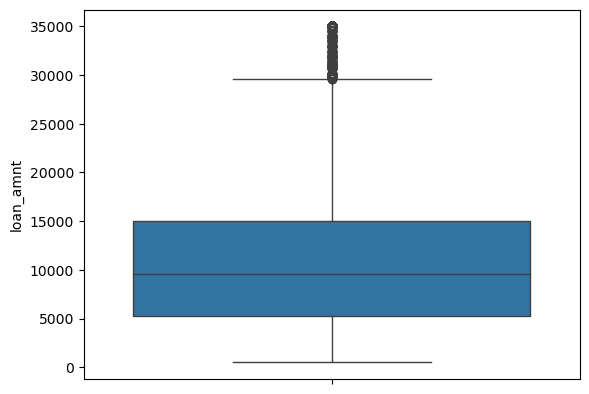

In [1560]:
# Checking outlier values in loan_amnt column
sns.boxplot(loan_df.loan_amnt)
plt.show()

<b> Upper fence turns out to be ~30k whereas max is 35k which is not a big difference, thus will not have much impact on the analysis. </b>

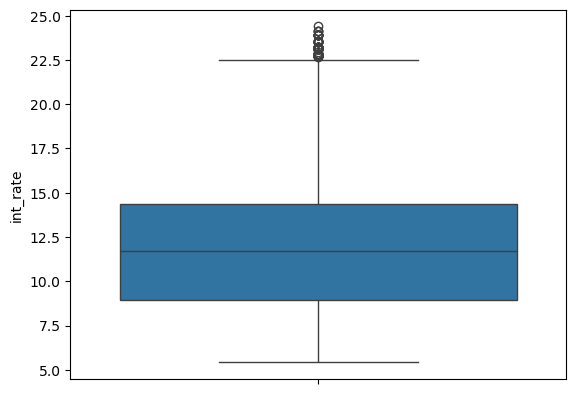

In [1562]:
# Checking outlier values in int_rate column
sns.boxplot(loan_df.int_rate)
plt.show()

<b> Upper fence turns out to be ~22.5k whereas max is ~24.5k which is not a big difference, thus will not have much impact on the analysis.</b>

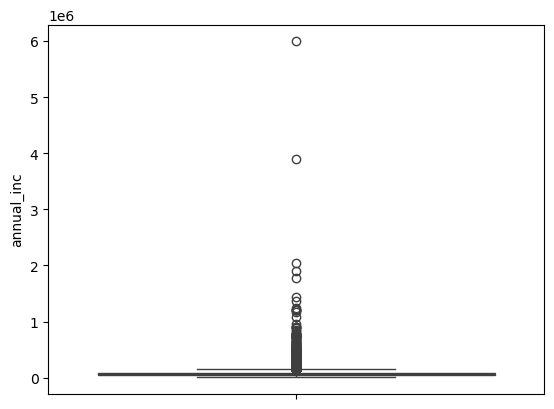

In [1564]:
# Checking outlier values in annual_inc column
sns.boxplot(loan_df.annual_inc)
plt.show()

<b> There seems to be a huge difference between the max and the upper fence thus we will remove the outliers in column annual_inc.</b>

In [1566]:
#Let's see the quantile info to find the appropriate quantile to use to remove outliers
quantile_info = loan_df.annual_inc.quantile([0.5,0.75,0.90,0.95,0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<b>As the annual_inc is increasing in exponentially around 99th percentile. Thus we can remove values greater than 99th percentile.</b>

In [1568]:
# Removing outliers in annual_inc greater than 99th percentile
loan_df = loan_df[loan_df.annual_inc<np.percentile(loan_df.annual_inc,99)]
loan_df.annual_inc.describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

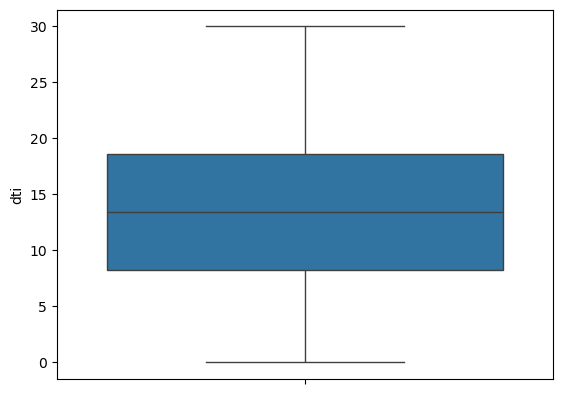

In [1570]:
# Checking outlier values in dti column
sns.boxplot(loan_df.dti)
plt.show()

<b> There are no outliers in dti hence we can move ahead with analysis.</b>

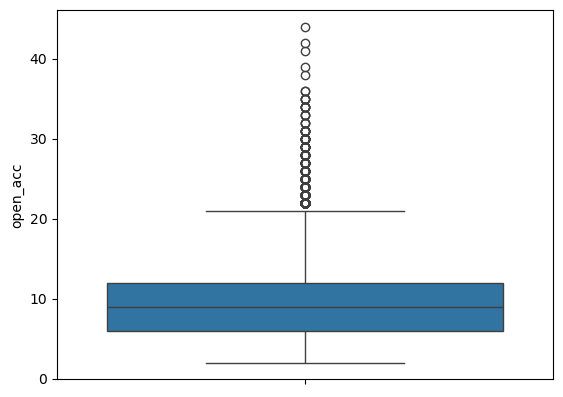

In [1572]:
# Checking outlier values in open_acc column
sns.boxplot(loan_df.open_acc)
plt.show()

<b> There is no big difference between upper fence and max values, thus will not have much impact on the analysis.</b>

<b> There is no big difference between upper fence and max values, thus will not have much impact on the analysis. <br> 
The data has been cleaned and outliers removed, we can move ahead with the analysis.</b>

# Univariate Analysis

Following fields will be checked as part of univariate analysis
1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Term (36 / 60 months) (term)
        3. Employment length (emp_length)
        4. Issue year (issue_y)
        5. Issue month (issue_m)
    2. Unordered categorical data
        1. Address State (addr_state)
        2. Loan purpose (purpose)
        3. Home Ownership (home_ownership)
        4. Verification Status (verification_status)
        5. Loan status (loan_status)       
2. Quantitative variables
    1. Interest rate bucket (int_rate_bucket)
    2. Annual income bucket (annual_inc_bucket)
    3. Loan amount bucket (loan_amnt_bucket)
    4. Debt to Income Ratio (DTI) bucket (dti_bucket)
    6. Open Credit Lines bucket (open_acc_bucket)
    7. Public Record Bankruptcies (pub_rec_bankruptcies)

In [1574]:
# Divding the columns as per categorical and numerical/Quantitative
cat_cols = ['term','grade','emp_length','home_ownership','verification_status','purpose','addr_state','issue_year','issue_month']
num_cols=['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec_bankruptcies']
result_col=['loan_status']

<b> Lets start Univariate Analysis on Categorical columns</b>

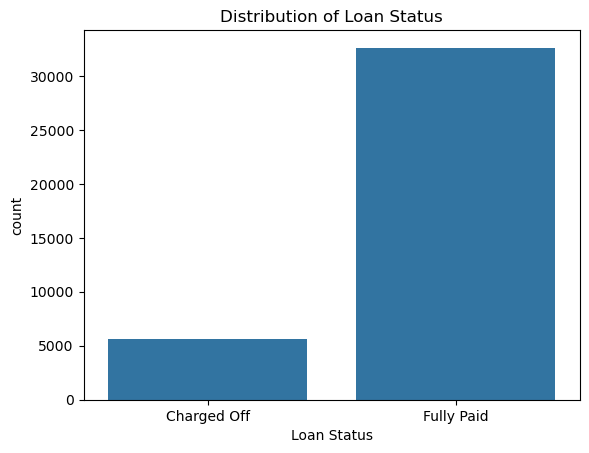

In [1576]:
#Plotting countplot on loan_status 
sns.countplot(x = 'loan_status', data = loan_df)
plt.xlabel('Loan Status')
plt.title('Distribution of Loan Status')
plt.show()

<b>Inference: Defaulted/charged off loans are much lower in count compared to Fully Paid loans.</b>

<b>Now, lets perform univariate analysis on the charged off loan data to identify the affect of each column on loan default</b>

In [1578]:
default_loan_df = loan_df[loan_df.loan_status == 'Charged Off']

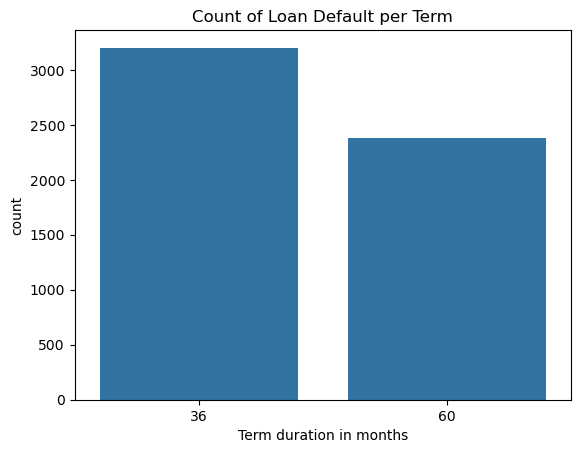

In [1580]:
#Plotting countplot on term 
sns.countplot(x = 'term', data = default_loan_df)
plt.xlabel('Term duration in months')
plt.title('Count of Loan Default per Term')
plt.show()

<b>Inference: Loan term of 36 months i.e. 3 years are more in count than loan term of 60 months i.e. 5 years</b>

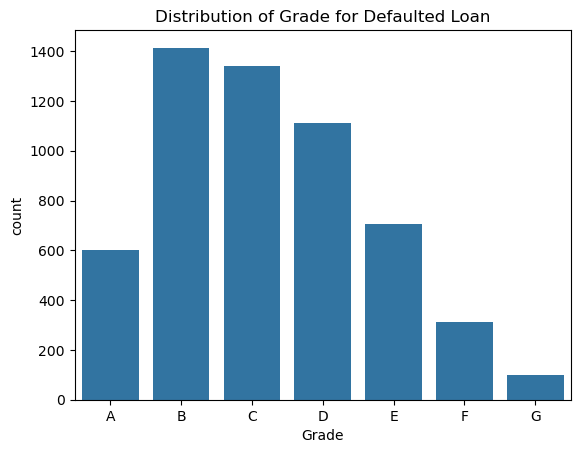

In [1582]:
#Plotting countplot on grade 
sns.countplot(x = 'grade', data = default_loan_df)
plt.xlabel('Grade')
plt.title('Distribution of Grade for Defaulted Loan')
plt.show()

<b> Inference: A large amount of defaulted loans are with grade 'B' and gradually decreases with grade.</b>

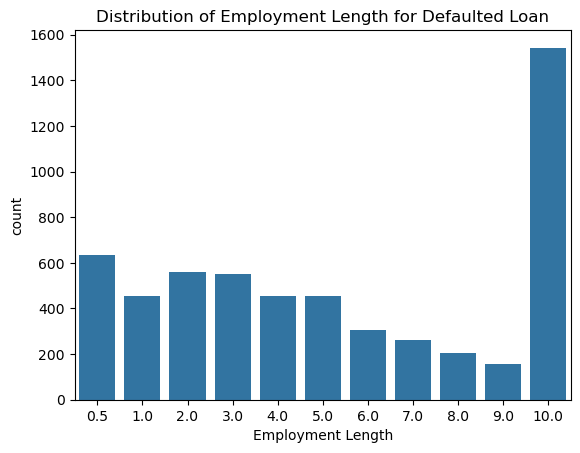

In [1584]:
#Plotting countplot on emp_length 
sns.countplot(x = 'emp_length', data = default_loan_df)
plt.xlabel('Employment Length')
plt.title('Distribution of Employment Length for Defaulted Loan')
plt.show()

<b> Inference: Majority of defaulted borrowsers have working experience greater than 10 years.</b>

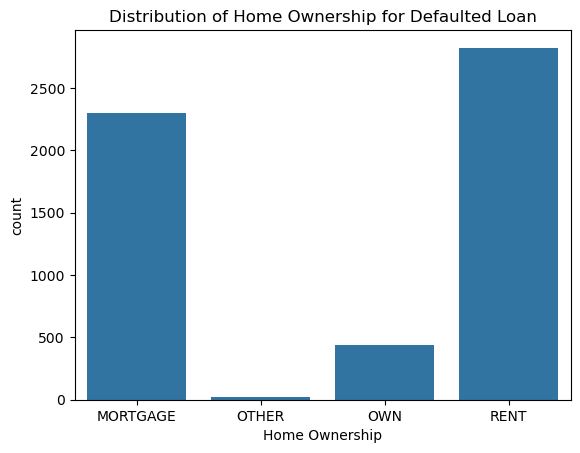

In [1586]:
#Plotting countplot on home_ownership 
sns.countplot(x = 'home_ownership', data = default_loan_df)
plt.xlabel('Home Ownership')
plt.title('Distribution of Home Ownership for Defaulted Loan')
plt.show()

<b> Inference: Majority of borrowsers don't posses property and are on mortage or rent.</b>

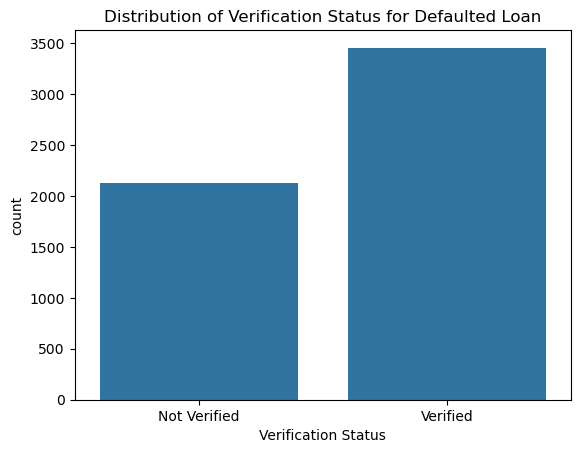

In [1714]:
#Plotting countplot on verification_status 
sns.countplot(x = 'verification_status', data = default_loan_df)
plt.xlabel('Verification Status')
plt.title('Distribution of Verification Status for Defaulted Loan')
plt.show()

<b>Inference: There are high number of defaulted borrowers who are verified. But around 60% of the defaulted borrowers are not verified.</b>

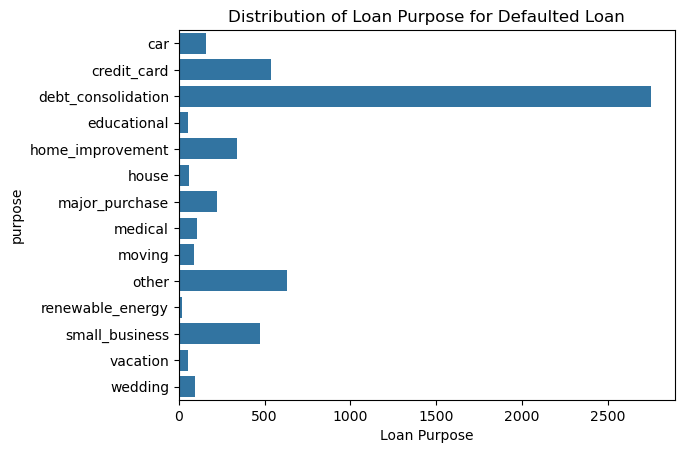

In [1590]:
#Plotting countplot on purpose 
sns.countplot(y = 'purpose', data = default_loan_df)
plt.xlabel('Loan Purpose')
plt.title('Distribution of Loan Purpose for Defaulted Loan')
plt.show()

<b>Inference: Highest percentage of defaulted loans are taken for debt consolidation followed by credit card, small business and others.</b>

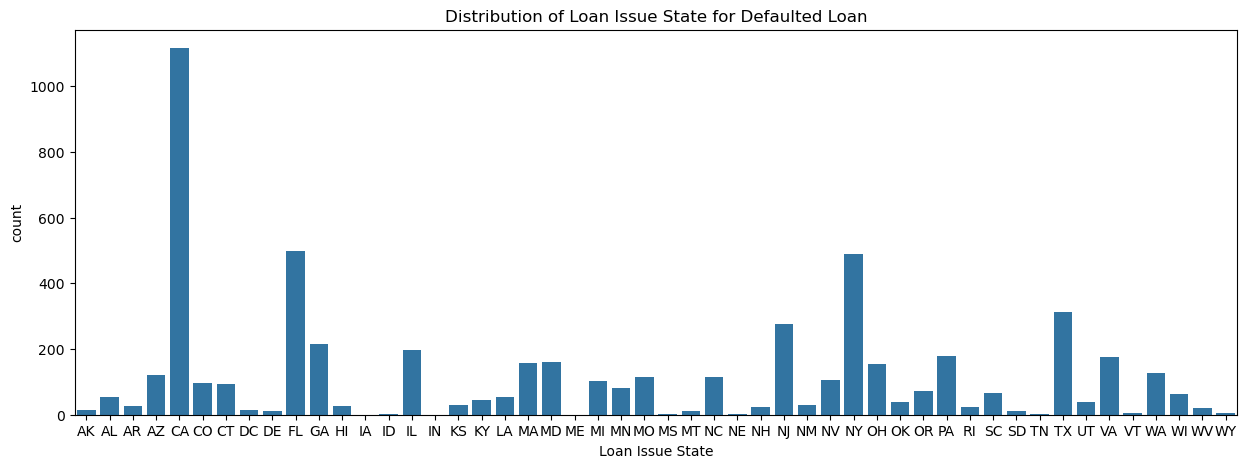

In [1592]:
#Plotting countplot on addr_state 
plt.figure(figsize=(15,5))
sns.countplot(x = 'addr_state', data = default_loan_df)
plt.xlabel('Loan Issue State')
plt.title('Distribution of Loan Issue State for Defaulted Loan')
plt.show()

<b>Inference: Majority of the defaulted borrowers are from the large urban cities like california, new york, texas, florida etc.</b>

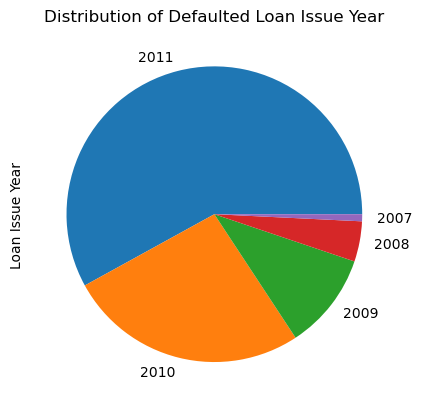

In [1594]:
#Plotting piechart on issue_year 
default_loan_df.issue_year.value_counts().plot(kind = 'pie')
plt.ylabel('Loan Issue Year')
plt.title('Distribution of Defaulted Loan Issue Year')
plt.show()

<b>Inference: Majority of the loans are given in year: 2011.</b>

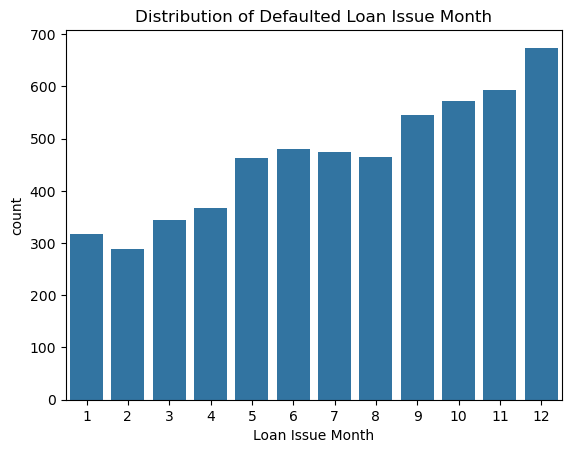

In [1596]:
#Plotting countplot on issue_month 
sns.countplot(x = 'issue_month', data = default_loan_df)
plt.xlabel('Loan Issue Month')
plt.title('Distribution of Defaulted Loan Issue Month')
plt.show()

<b>Inference: Majority of the defaulted loans are given in last quarter of the year.</b>

<b>Lets analyse the quantitative columns</b>

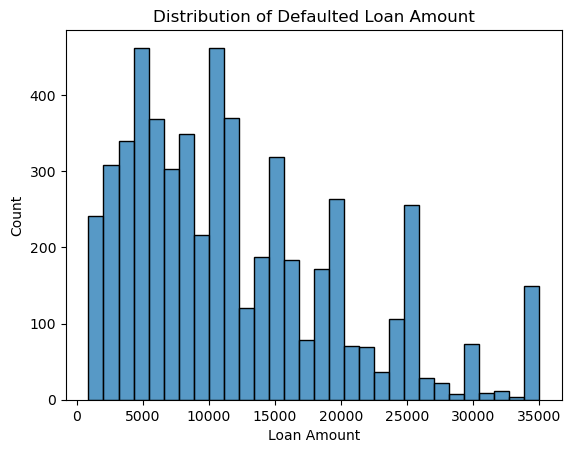

In [1598]:
#Plotting histogram of loan amount
sns.histplot(default_loan_df.loan_amnt)
plt.xlabel('Loan Amount')
plt.title('Distribution of Defaulted Loan Amount')
plt.show()

In [1600]:
#Analyse loan amount column
default_loan_df.loan_amnt.describe()

count     5584.000000
mean     12042.814291
std       8041.184317
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<b>Inference: The loan amount varies from 900 to 35000 with a mean of 12104</b>

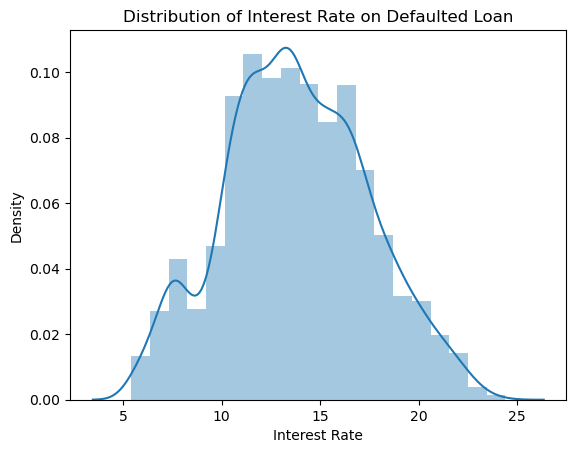

In [1602]:
# Distribution of interest rate
sns.distplot(default_loan_df.int_rate,kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate on Defaulted Loan')
plt.show()

<b>Inference: The interest rate is more crowded around 10-18.</b>

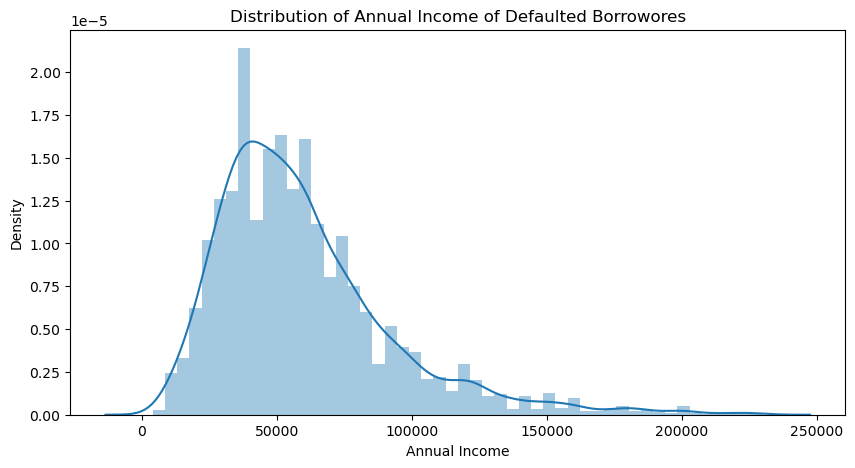

In [1604]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(default_loan_df.annual_inc,kde=True)
plt.xlabel('Annual Income')
plt.title('Distribution of Annual Income of Defaulted Borrowores')
plt.show()

<b>Inference: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.</b>

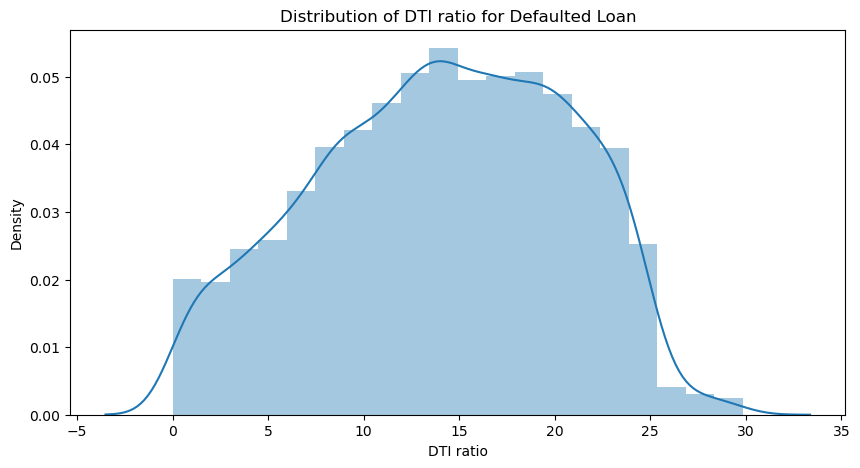

In [1606]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(default_loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.title('Distribution of DTI ratio for Defaulted Loan')
plt.show()

<b>Inference: Majority of the defaulted borrowers have very large debt compared to the income registerd, concentrated in the 10-20 DTI ratio.</b>

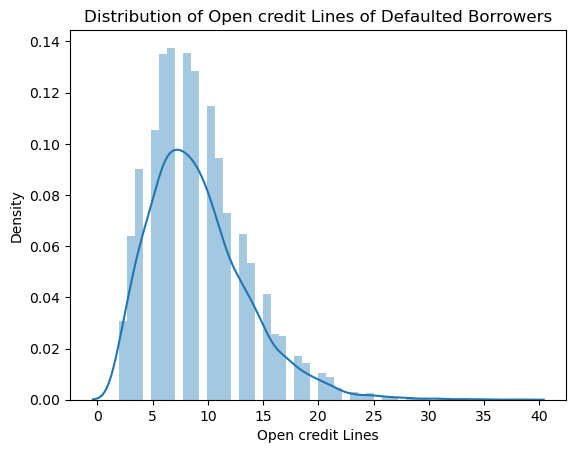

In [1608]:
# Distribution of open_acc
sns.distplot(default_loan_df.open_acc)
plt.xlabel('Open credit Lines')
plt.title('Distribution of Open credit Lines of Defaulted Borrowers')
plt.show()

<b> Inference: Majority of the borrowers have Open credit lines between 5 to 12 and it is left skewed.</b>

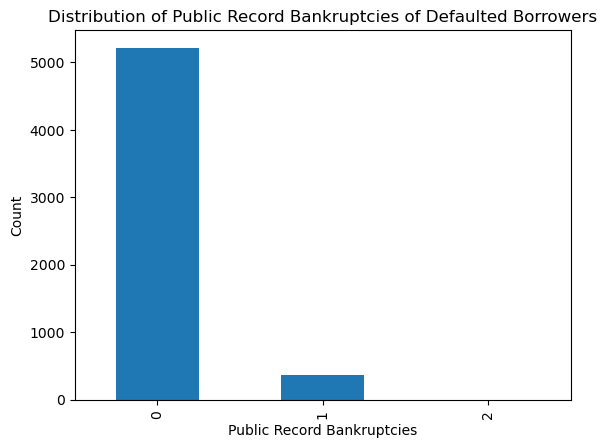

In [1610]:
# Distribution of pub_rec_bankruptcies
default_loan_df.pub_rec_bankruptcies.value_counts().plot(kind='bar')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of Public Record Bankruptcies of Defaulted Borrowers')
plt.show()

<b>Inference: Majority of the borrowers have no record of Public Record Bankruptcy.</b>

# Segmented Univariate Analysis

In [1639]:
#creating buckets for quantitative columns
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=9,precision =0,labels=['6%-8%','8%-10%','10%-12%','12%-14%','14%-16%','16%-18%','18%-20%','20%-22%','22%-24%'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=10,precision =0,labels =['0k-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-160k','160k-180k','180k-200k'])
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels =['0k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'], bins=6,precision =0,labels =['0-5','5-10','10-15','15-20','20-25','25-30'])

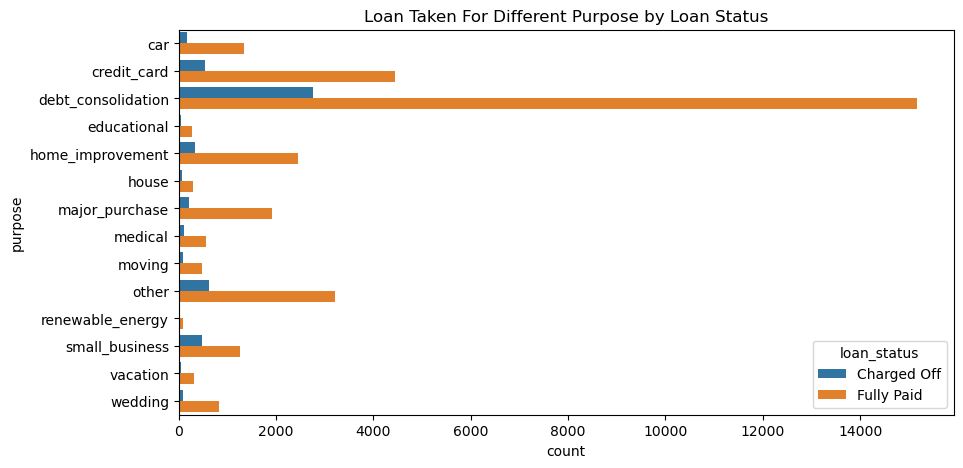

In [1614]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,y='purpose',hue='loan_status')
plt.title('Loan Taken For Different Purpose by Loan Status')
plt.show()

<b>Inference: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.</b>

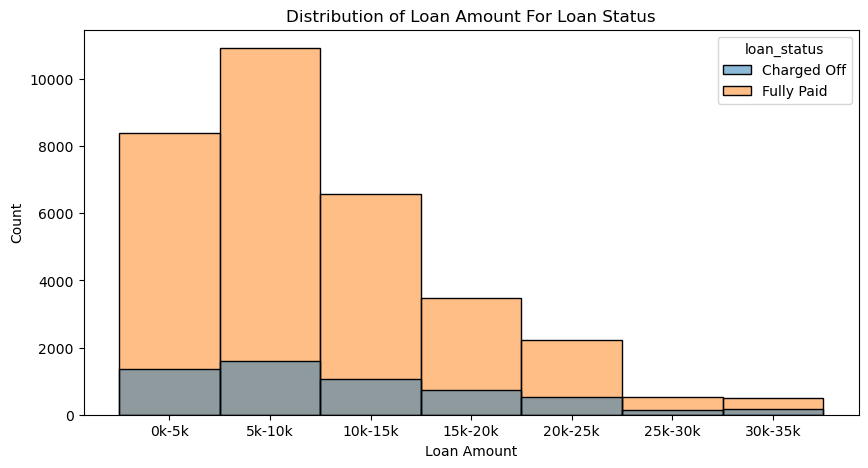

In [1658]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='loan_amnt_groups',hue='loan_status')
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount For Loan Status')
plt.show()

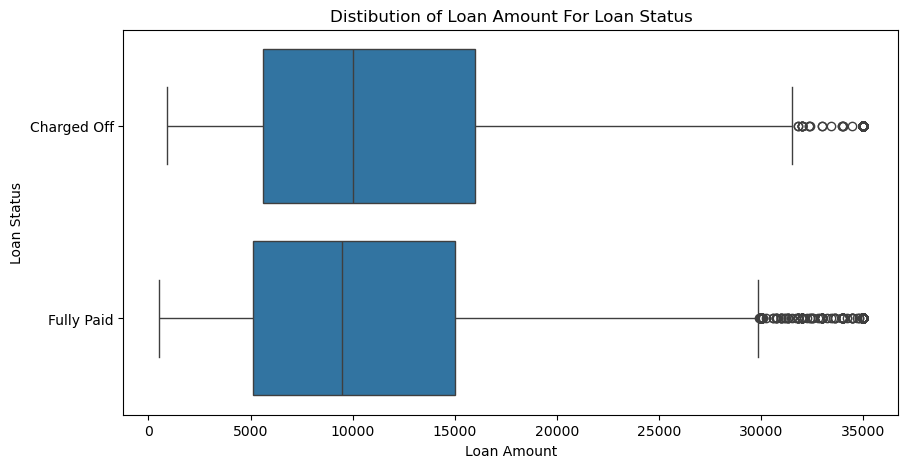

In [1656]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status')
plt.show()

<b>Inference: The mean and 25% percentile are almost same for both but we see larger 75% percentile in the charged off loan which indicates large amount of loan has higher chance of defaulting.</b>

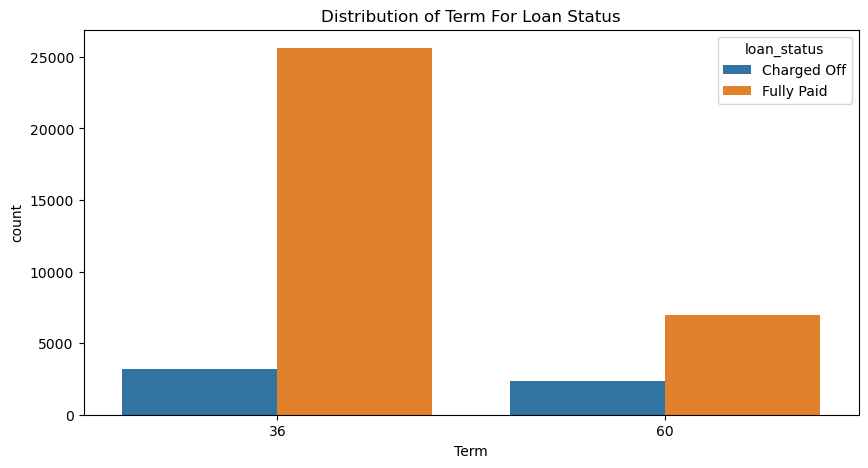

In [1618]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.title('Distribution of Term For Loan Status')
plt.show()

<b>Inference: The 60 month term has higher chance of defaulting whereas the 36 month term has higher chance of fully paid loan.</b>

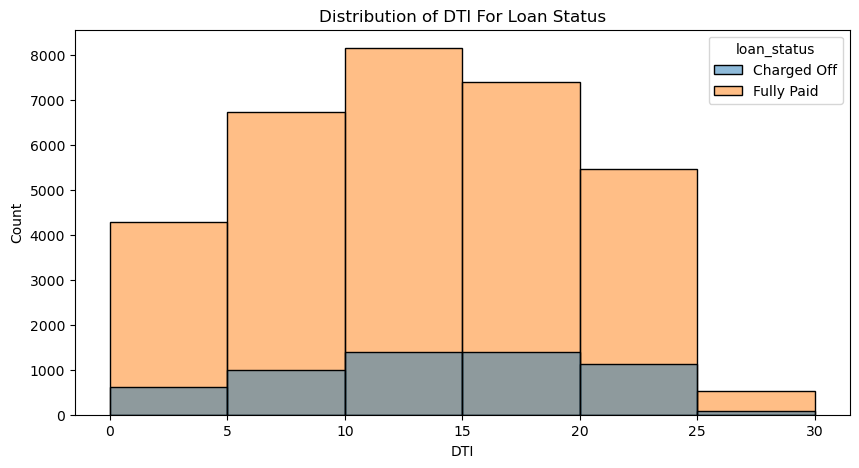

In [1620]:
# Distribution of DTI based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=6)
plt.xlabel('DTI')
plt.title('Distribution of DTI For Loan Status')
plt.show()

<b> Inference: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-20 have higher number of defaulted loan but higher dti has higher chance of defaulting.</b>

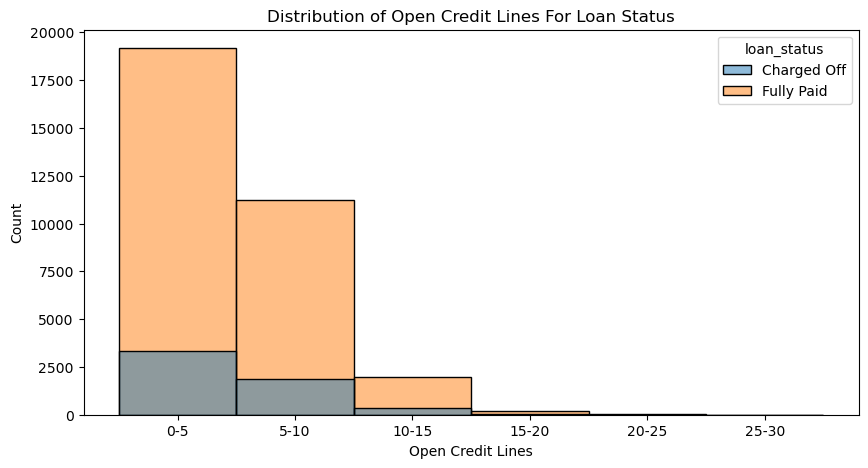

In [1652]:
# Distribution of Open credit lines based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='open_acc_groups',hue='loan_status')
plt.xlabel('Open Credit Lines')
plt.title('Distribution of Open Credit Lines For Loan Status')
plt.show()

<b>Inference: The Loan Status varies with Open credit lines, we can see that the loans with 5-10 have higher number of defaulted loan.</b>

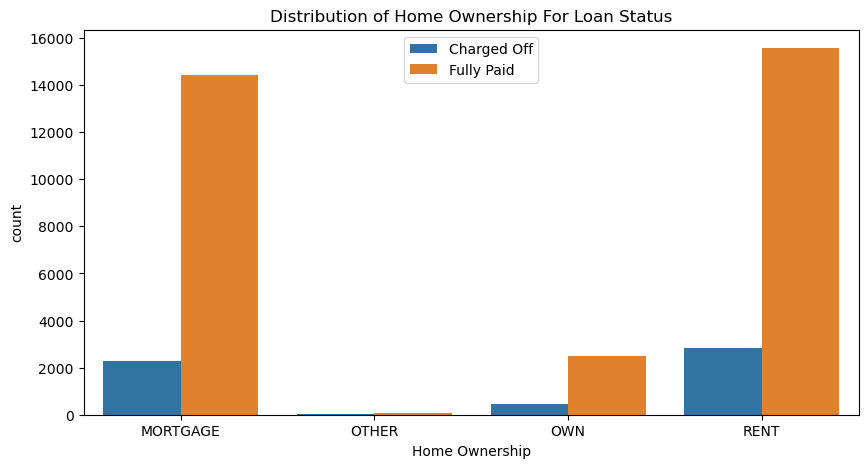

In [1625]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.title('Distribution of Home Ownership For Loan Status')
plt.legend(loc='upper center')
plt.show()

<b>Inference: The Defaulted loan are higher for the burrowers on mortgage or rent.</b>

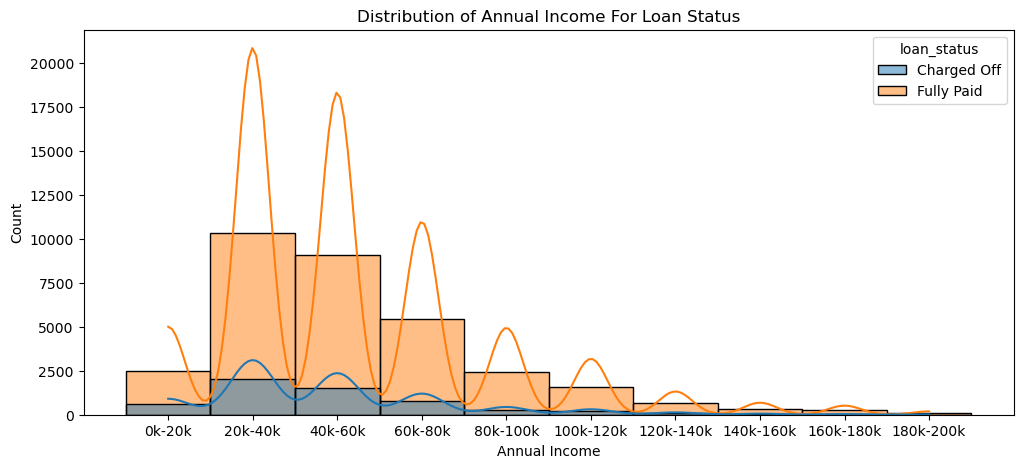

In [1716]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(12,5))
sns.histplot(data=loan_df,x='annual_inc_groups',hue='loan_status',bins=10,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

<b> Inference: Burrowers with 20000-60000 annual income are more likely to default and higher annual income are less likely to default.</b>

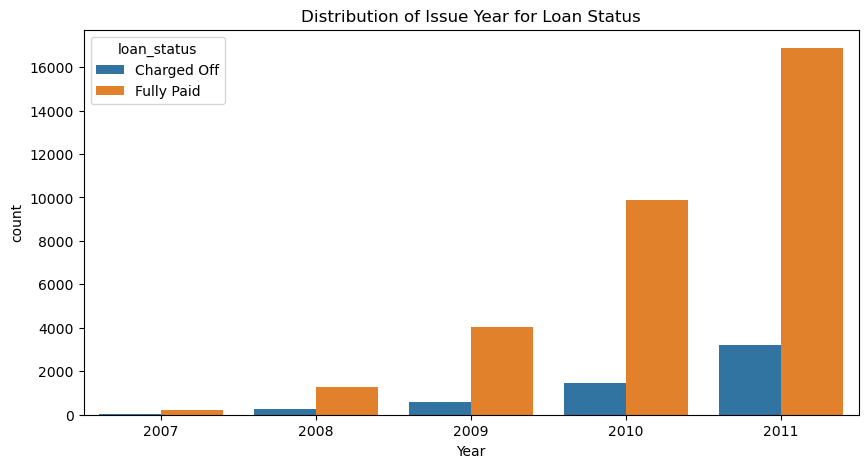

In [900]:
# Distribution of issue_year based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='issue_year',hue='loan_status')
plt.xlabel('Year')
plt.title('Distribution of Issue Year for Loan Status')
plt.show()

<b> Inference: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.</b>

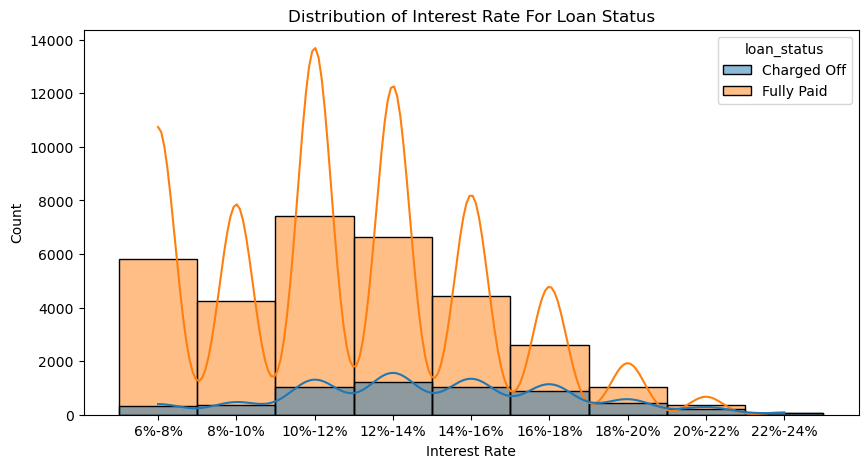

In [1641]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='int_rate_groups',hue='loan_status', kde=True)
plt.xlabel('Interest Rate')
plt.title('Distribution of Interest Rate For Loan Status')
plt.show()

<b>Inference: The default loan amount increases with increase in interest rate.</b>

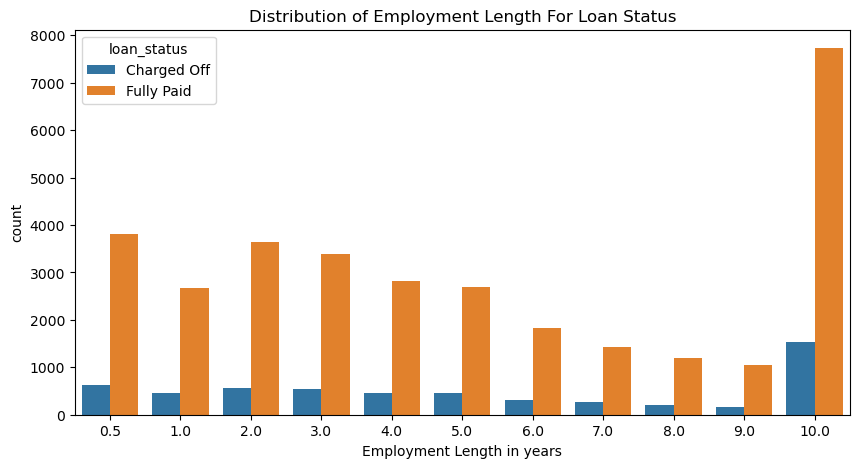

In [907]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.title('Distribution of Employment Length For Loan Status')
plt.show()

<b>Inference: The difference between fully paid and default ratio is high in less years of experience and decreases for 10+ years of experience.</b>

# Bivariate Analysis

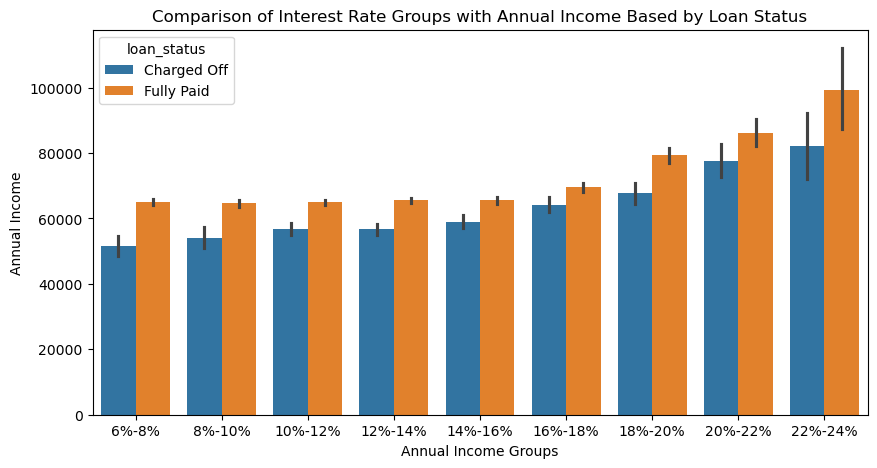

In [1710]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan_df,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.xlabel('Annual Income Groups')
plt.ylabel('Annual Income')
plt.title('Comparison of Interest Rate Groups with Annual Income Based by Loan Status')
plt.show()

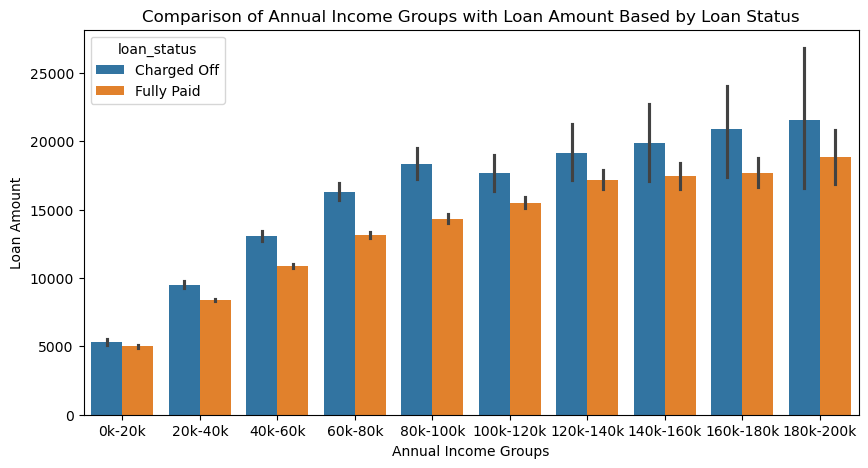

In [1702]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan_df,x='annual_inc_groups', y='loan_amnt', hue ='loan_status')
plt.xlabel('Annual Income Groups')
plt.ylabel('Loan Amount')
plt.title('Comparison of Annual Income Groups with Loan Amount Based by Loan Status')
plt.show()

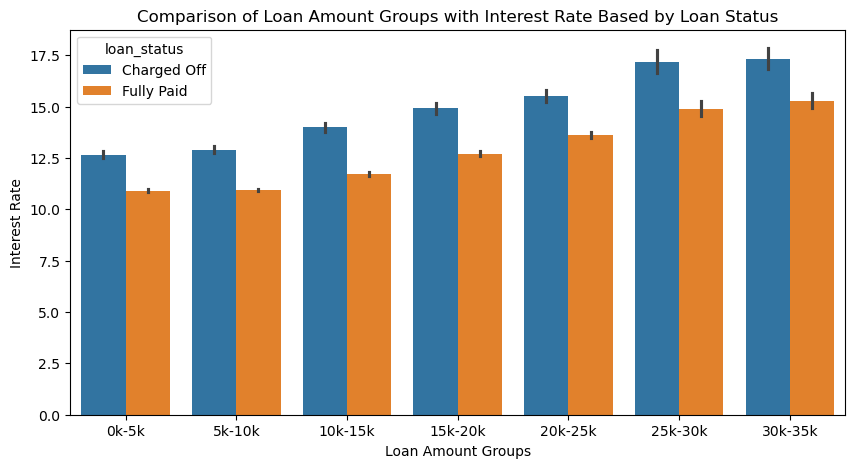

In [1712]:
plt.figure(figsize=(10,5))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.xlabel('Loan Amount Groups')
plt.ylabel('Interest Rate')
plt.title('Comparison of Loan Amount Groups with Interest Rate Based by Loan Status')
plt.show()

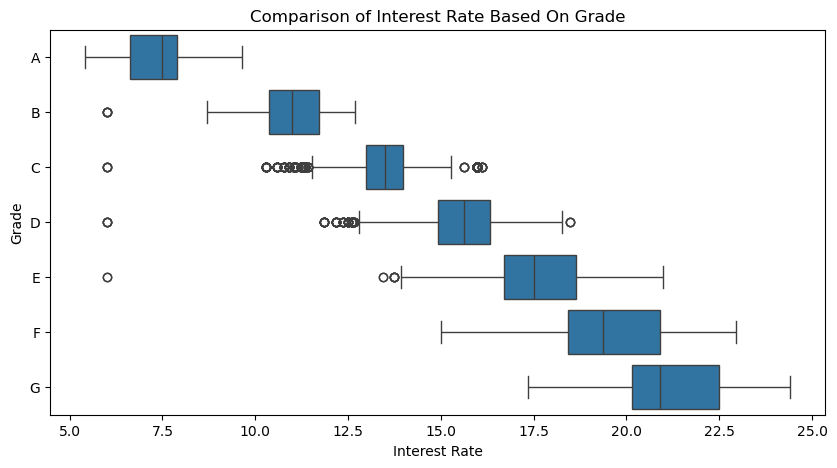

In [1672]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade')
plt.show()

<b>Inference: The Grade represent risk factor thus we can say interst rate increases with the risk.</b>

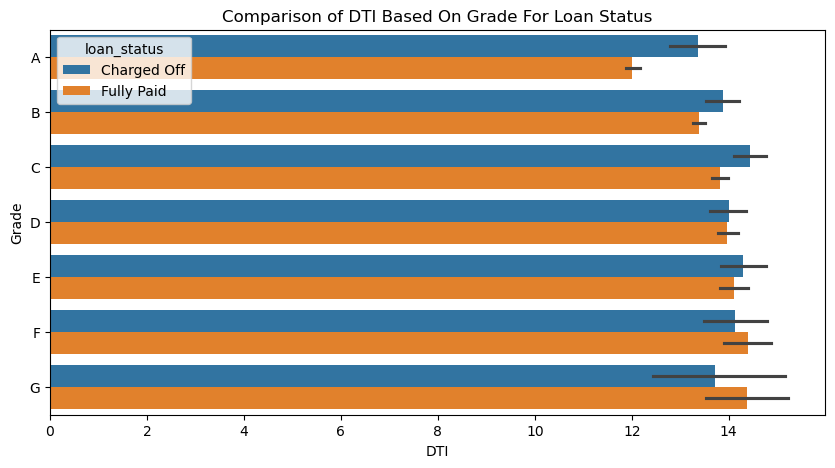

In [1674]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status')
plt.show()

<b>Inference: The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.</b>

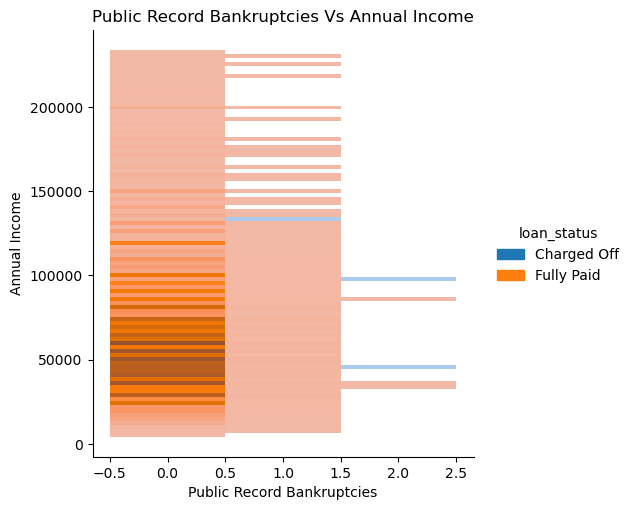

In [1676]:
# Comparison of annual income to public record bankruptcy over loan status
sns.displot(x=loan_df.pub_rec_bankruptcies.astype('category'),y=loan_df.annual_inc,hue=loan_df.loan_status)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Annual Income')
plt.title('Public Record Bankruptcies Vs Annual Income')
plt.show()

<b>Inference: The borrowers with no record of Public Recorded Bankruptcy are safe choice for loan issue.</b>

# Multivariate Analysis

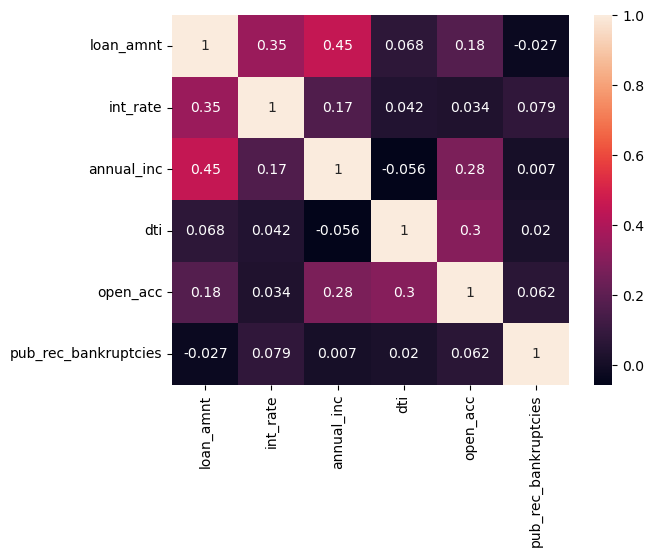

In [1680]:
# Lets analyse correlation between different numerical columns of defaulted loan status
Default_loan_df = loan_df[loan_df.loan_status == 'Charged Off']
num_cols=['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec_bankruptcies']
correlation = Default_loan_df[num_cols].corr(method='pearson')
sns.heatmap(correlation, annot=True) 
plt.show()

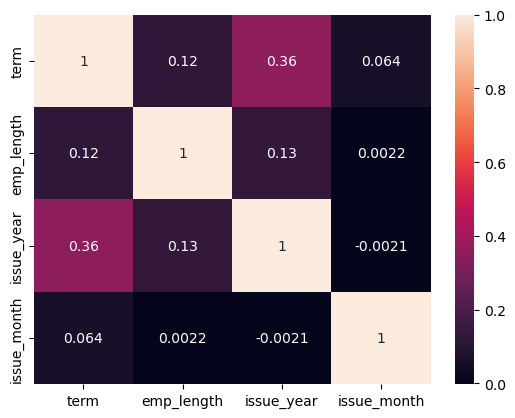

In [1678]:
# Lets analyse correlation between different parameters of defaulted loan status
Default_loan_df = loan_df[loan_df.loan_status == 'Charged Off']
cat_cols = ['term','emp_length','issue_year','issue_month']
correlation = Default_loan_df[cat_cols].corr(method='pearson')
sns.heatmap(correlation, annot=True) 
plt.show()

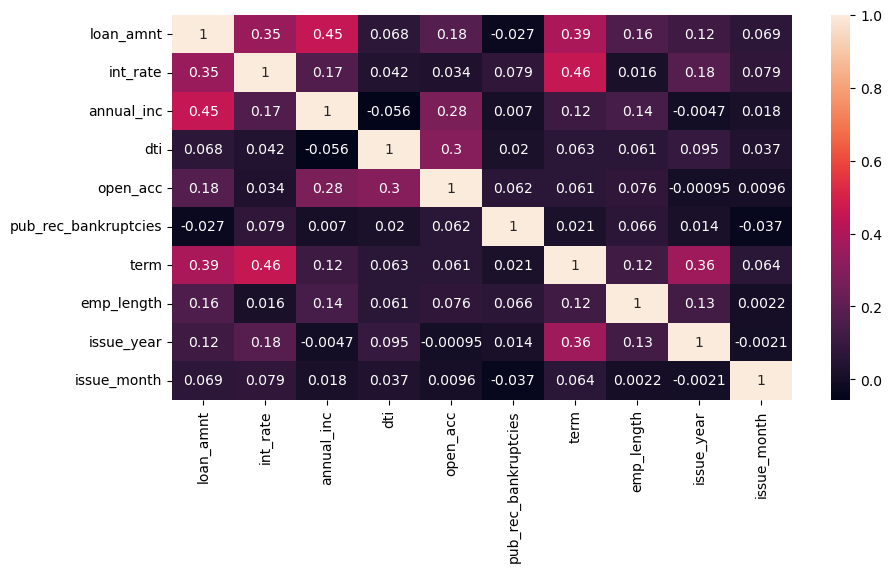

In [1700]:
# Lets analyse correlation between all columns of defaulted loan status
plt.figure(figsize=(10,5))
Default_loan_df = loan_df[loan_df.loan_status == 'Charged Off']
cols=['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec_bankruptcies','term','emp_length','issue_year','issue_month']
correlation = Default_loan_df[cols].corr(method='pearson')
sns.heatmap(correlation, annot=True) 
plt.show()

# Insights
## Univariate Analysis
- The number of defaulted loan(5k) is 7 times less than the number of fully paid loan(35k).
- The majority(almost 3 times) of loan has a term of 36 months compared to 60 months.
- A large amount of loans are with grade 'B' commpared to rest showing most loans are high grade loans.
- Majority of borrowsers have working experience greater than 10 years.
- Majority of borrowsers don't posses property and are on mortage or rent.
- About 50% of the borrowers are not verified by company or source.
- Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.
- The interest rate is more crowded around 10-15.
- A large percentage of loans are taken for debt consolidation followed by credit card purpose.
- Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
- Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
- Majority of the borrowers have no record of Public Recorded Bankruptcy.
- Majority of the loans are given in last quarter of the year.
- The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

## Segmented Univariate Analysis
- Debt Consolidation is the most popular loan purpose and has highest number of defaulted loan.
- The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate loan of large amount has higher chance of defaulting.
- The 36 month term has higher chance of defaulting than 60 month term.
- The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
- The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
- Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
- The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
- The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
- The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

## Bivariate Analysis
- The loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.
- Loan applicants applying for loans with a 36-month term are more likely to default than those taking loans for 60 months.
- Most loan applicants have ten or more years of experience, and they are also the most likely to default.
- The number of loan applicants has steadily increased from 2007 to 2011, indicating a positive trend in the upcoming years.
- December is the most preferred month for taking loans, possibly due to the holiday season.
- Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.
- Loan applicants who live in rented or mortgaged houses are more likely to default.
- Verified loan applicants are defaulting more than those who are not verified.
- Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.
- A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

## Multivariate Analysis
- Tendency to default the loan is likely with loan applicants belonging to B, C, D grades.
- Loan applicants with 10 years of experience has maximum tendancy to default the loan.
- Borrowers from states CA, FL, NJ have maximum tendency to deafult the loan.
- Borrowers from Rented House Ownership have highest tendency to default the loan.
- The borrowers who are in lower income groups have maximum tendency to default the loan and it generally decreases with the increase in the annual income.
- The tendency to default the loan is increasing with increase in the interest rate.

### Recommendations

#### Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
- DTI
- Grades
- Verification Status
- Annual income
- Pub_rec_bankruptcies
#### Other considerations for 'defaults' :
- Burrowers not from large urban cities like california, new york, texas, florida etc.
- Burrowers having annual income in the range 50000-100000.
- Burrowers having Deregatory Public Record or Public Recorded Bankruptcy.
- Burrowers with grades like B, C indicates high risk.
- Burrowers with very high Debt to Income value.
- Burrowers with working experience 10+ years.
